<h1><b><Center>
Perceptron algorithm to the Iris dataset

In [38]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [15]:
data = load_iris()
new_data = pd.DataFrame(data.data,columns=data.feature_names)
new_data['species'] = data.target
df_binary = new_data[new_data['species'].isin([0, 1])]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


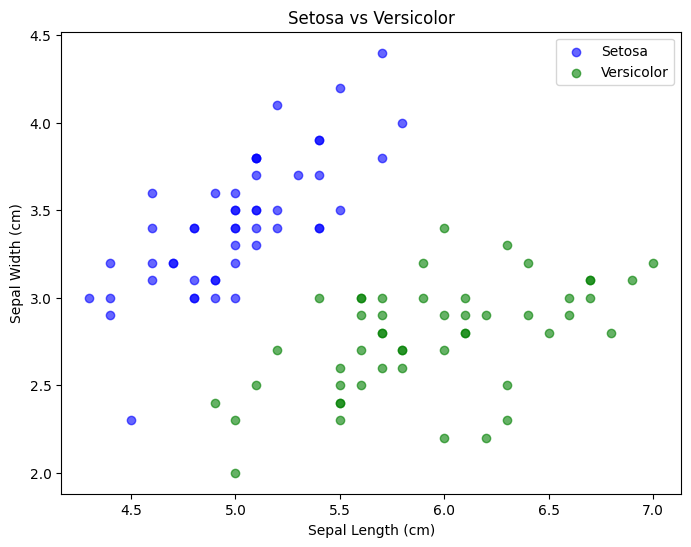

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df_binary[df_binary['species'] == 0]['sepal length (cm)'], 
            df_binary[df_binary['species'] == 0]['sepal width (cm)'], 
            color='blue', label='Setosa', alpha=0.6)
plt.scatter(df_binary[df_binary['species'] == 1]['sepal length (cm)'], 
            df_binary[df_binary['species'] == 1]['sepal width (cm)'], 
            color='green', label='Versicolor', alpha=0.6)

# Labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Setosa vs Versicolor')
plt.legend()

In [16]:
x = df_binary[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
y = df_binary["species"]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y_train

55    1
88    1
26    0
42    0
69    1
     ..
60    1
71    1
14    0
92    1
51    1
Name: species, Length: 80, dtype: int64

In [27]:
ann=Perceptron(eta0=0.1,max_iter=500)
ann.fit(x_train,y_train)

Perceptron(eta0=0.1, max_iter=500)

In [28]:
y_pred = ann.predict(x_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [43]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

train_data = np.hstack((x_train_scaled, y_train.values.reshape(-1, 1)))
test_data = np.hstack((x_test_scaled, y_test.values.reshape(-1, 1)))

In [44]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row) - 1): 
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [45]:

def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for _ in range(len(train[0]))] 
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error ** 2
            weights[0] += l_rate * error 
            for i in range(len(row) - 1):  
                weights[i + 1] += l_rate * error * row[i]
    return weights

weights = train_weights(train_data, l_rate=0.1, n_epoch=20)




In [46]:
y_true = []
y_pred = []

for row in test_data:
    prediction = predict(row, weights)
    y_pred.append(prediction)
    y_true.append(row[-1])

In [47]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



<h1><hr><br><center>THE END